In [6]:
np.mean(Plaq)

0.6023127564898023

In [7]:
np.var(Plaq)

7.421374249564407e-07

In [49]:
np.sqrt(7.421374249564407e-07)

0.0008614739839115518

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import linalg
%config InlineBackend.figure_format='svg'#矢量图设置

In [2]:
def Plaquette(Link):
    sh = Link.shape
    Re = np.zeros((sh[0],sh[1],sh[2],sh[3]))  #results on t,x,y,z point   
    for c0 in range(sh[0]):
        for c1 in range(sh[1]):
            for c2 in range(sh[2]):
                for c3 in range(sh[3]):
                    P = 0
                    for u in range(4):
                        for v in range(4):
                            if u>v:
                                t1,x1,y1,z1=c0,c1,c2,c3
                                Uu = Link[t1,x1,y1,z1,u,:,:] 
                                t1,x1,y1,z1 = Move(u,1,t1,x1,y1,z1,sh)   
                                Uv1 = Link[t1,x1,y1,z1,v,:,:] 
                                t1,x1,y1,z1 = Move(u,-1,t1,x1,y1,z1,sh) 
                                t1,x1,y1,z1 = Move(v,+1,t1,x1,y1,z1,sh)            
                                Uuc = Link[t1,x1,y1,z1,u+4,:,:] # c means complex conjugate inverse the direction
                                t1,x1,y1,z1 = Move(v,-1,t1,x1,y1,z1,sh) 
                                Uvc = Link[t1,x1,y1,z1,v+4,:,:]
                                Puv = 0.5*np.trace(Uu@Uv1@Uuc@Uvc).real
                                P = P+Puv
                    Re[c0,c1,c2,c3] = P/6
    return Re.mean()

def W(Link,x,t,r):    # t is time and r is distance  rectangle one x is direction x,y,z,we always need time direction without write out.
    sh = Link.shape
    Re = np.zeros((sh[0],sh[1],sh[2],sh[3]))  #results on t,x,y,z point  
    # in pervious version I define U0tx,U1tx,U0txh and U1txh here and I spent around 2 weeks to find this bug！！！！
    for c0 in range(sh[0]):
        for c1 in range(sh[1]):
            for c2 in range(sh[2]):
                for c3 in range(sh[3]):
                    t0,x0,y0,z0= c0,c1,c2,c3
                    U0tx = np.identity(2,dtype=np.complex128)
                    U1tx = np.identity(2,dtype=np.complex128)
                    U0txh = np.identity(2,dtype=np.complex128)
                    U1txh = np.identity(2,dtype=np.complex128)
                    for i0 in range(t):
                        U0tx = U0tx @ Link[t0,x0,y0,z0,0,:,:]
                        t0,x0,y0,z0 = Move(0,1,t0,x0,y0,z0,sh)
                    for i1 in range(r):
                        U1tx = U1tx @ Link[t0,x0,y0,z0,x,:,:]
                        t0,x0,y0,z0 = Move(x,1,t0,x0,y0,z0,sh)
                    for i2 in range(t):
                        t0,x0,y0,z0 = Move(0,-1,t0,x0,y0,z0,sh)
                        U0txh = U0txh @ Link[t0,x0,y0,z0,4,:,:]
                    for i3 in range(r):
                        t0,x0,y0,z0 = Move(x,-1,t0,x0,y0,z0,sh)
                        U1txh = U1txh @ Link[t0,x0,y0,z0,x+4,:,:]
                    P = np.trace(U0tx@U1tx@U0txh@U1txh).real
                    Re[c0,c1,c2,c3] = P
    return Re.mean()

def Move(u,a,t,x,y,z,sh): # a single move on lattice
    if u == 0:
        t = (t+a)%sh[0]
    if u == 1:
        x = (x+a)%sh[1]
    if u == 2:
        y = (y+a)%sh[2]
    if u == 3:
        z = (z+a)%sh[3]
    return t,x,y,z

In [5]:
import os
path1 = 'F:\\QCD\gauge_configs\\' 
files= os.listdir(path)
Plaq = []
N = 0
for file in files:
    Link = np.load(path+file)
    Plaq.append(Plaquette(Link))
    N = N+1
    print('\r',N,end='')

 500

In [6]:
# 13:02
import os  
path = 'F:\\QCD\gauge500\\' 
files= os.listdir(path)
time = 16
W11_500 = np.zeros((100,16))
N = 0
for file in files:
    Link = np.load(path+file)
    for t in range(time):
        W11_500[N,t] = W(Link,1,t+1,1)+W(Link,2,t+1,1)+W(Link,3,t+1,1)
    N = N+1
    print('\r',N,end='')

 100

In [8]:
np.save( 'F:\\QCD\WilisonLoop11_500.npy',W11_500 )

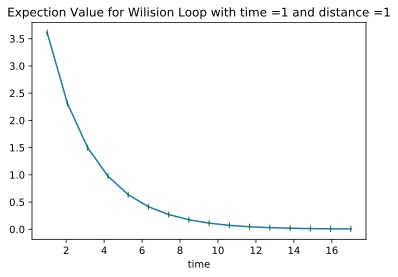

In [55]:
y = np.mean(W11_500,axis = 0)
error = np.std(W11_500,axis = 0) 
x = np.linspace(1,17,16)
plt.errorbar(x,y,yerr=error, marker = "|",mfc='red',mec='green')
plt.title('Expection Value for Wilision Loop with time =1 and distance =1')
plt.xlabel('time')
plt.savefig('F:\\QCD\Wil',dpi = 600)
plt.show()

In [40]:
Energy11 = np.zeros((100,15))
for i in range(15):
    for k in range(100):
        Energy11[k,i] = W11_500[k,i]/W11_500[k,i+1]

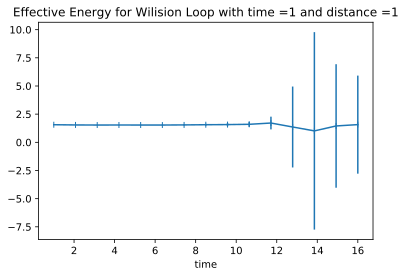

In [56]:
y = np.mean(Energy11,axis = 0)
energyerror = np.std(Energy11,axis = 0) 
x = np.linspace(1,16,15)
plt.errorbar(x,y,yerr=energyerror, marker = "|",)
plt.title('Effective Energy for Wilision Loop with time =1 and distance =1')
plt.xlabel('time')
plt.savefig('F:\\QCD\Energy',dpi = 600)
plt.show()

In [62]:
y

array([1.56243016, 1.54226981, 1.5348882 , 1.53740426, 1.53523577,
       1.53454568, 1.54569248, 1.56225587, 1.57396615, 1.59973162,
       1.71236281, 1.36077645, 1.01490185, 1.45253761, 1.57184764])

In [61]:
energyerror

array([4.72574913e-03, 6.73730289e-03, 9.82636343e-03, 1.47182119e-02,
       2.30287337e-02, 3.60155274e-02, 5.56394789e-02, 8.50139120e-02,
       1.45422975e-01, 2.22576133e-01, 5.67354715e-01, 3.59062492e+00,
       8.76203622e+00, 5.48223246e+00, 4.35238025e+00])

In [29]:
import os
path1 = 'F:\\QCD\gauge200\\100.npy' 
path2 = 'F:\\QCD\gauge200\\101.npy' 
path3 = 'F:\\QCD\gauge200\\102.npy' 
path4 = 'F:\\QCD\gauge200\\103.npy' 
path5 = 'F:\\QCD\gauge200\\104.npy' 
path6 = 'F:\\QCD\gauge200\\105.npy' 

Link1 = np.load(path1)
Link2 = np.load(path2)
Link3 = np.load(path3)
Link4 = np.load(path4)
Link5 = np.load(path5)
Link6 = np.load(path6)
C = np.zeros(6)
sh = Link1.shape
N = sh[0]*sh[1]*sh[2]*sh[3]*4
for t in range(sh[0]):
    for x in range(sh[1]):
        for y in range(sh[2]):
            for z in range(sh[3]):
                for k in range(4):
                    C[0] = C[0] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link1[t,x,y,z,k+4,:,:]).real
                    C[1] = C[1] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link2[t,x,y,z,k+4,:,:]).real
                    C[2] = C[2] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link3[t,x,y,z,k+4,:,:]).real
                    C[3] = C[3] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link4[t,x,y,z,k+4,:,:]).real
                    C[4] = C[4] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link5[t,x,y,z,k+4,:,:]).real
                    C[5] = C[5] + 1/N*np.trace(Link1[t,x,y,z,k,:,:]@Link6[t,x,y,z,k+4,:,:]).real
C[:]=C[:]/C[0]

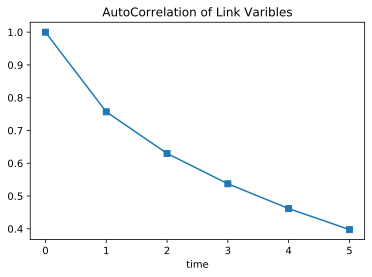

In [57]:
fig2 = plt.figure()
plt.plot(C,marker = 's')
plt.title('AutoCorrelation of Link Varibles')
plt.xlabel('time')
plt.savefig('F:\\QCD\AutoC',dpi = 600)
plt.show()